### Example Usage of the HGT aware Gene Gain / Loss Model

In [3]:
import gene_model
import gfs
import color_scheme

from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
# Simulation Parameters
theta = 200 # Gene Gain rate
rho = 0.1 # Gene Loss rate

gene_conv = 0 # Gene Conversion rate
recomb = 0 # Recombination rate
hgt_rate = 0.0001 # HGT rate


num_sites = 30000 # Number of sites to simulate
num_samples = 5 # Number of samples / individuals

### Compute a tskit.TreeSequence with mutations

In [9]:
mts = gene_model.gene_model(
    theta=theta,
    rho=rho,
    gene_conversion_rate=gene_conv,
    recombination_rate=recomb,
    hgt_rate=hgt_rate,
    num_samples=num_samples,
    num_sites=num_sites,
    double_site_relocation=True, # Fix double gene gain events, won't hide the warning.
)
mts

KeyboardInterrupt: 

In [ ]:
#for tree in mts.trees():
    #print(tree.draw_text())

for var in mts.variants():
    print(var.site.position, var.alleles, var.genotypes, sep="\t")

In [ ]:
for variant in mts.variants():
    print("Position:", variant.site.position)
    print("Alleles:", variant.alleles)
    print("Genotypes:", variant.genotypes)

### Compute multiple GFS to get a distribution for each GF Class for a fixed tree.

In [6]:
num_simulations = 200
processes = 10
nwk = "(((A:0.1, B:0.1):0.15, (C:0.05, D:0.05):0.2):0.2, E:0.35);"

#         /\
#      __/  \
#     /   \  \
#    /\    \  \
#   |  |   /\  \
#   A  B  C  D  E     

gm = gene_model.multi_genotype_matrices(
    n=num_simulations,
    processes=processes,
    theta=theta,
    rho=rho,
    num_sites=num_sites,
    num_samples=num_samples,
    gene_conversion_rate=gene_conv,
    recombination_rate=recomb,
    hgt_rate=hgt_rate,
    ce_from_nwk=nwk,
    check_double_gene_gain=False,
    double_site_relocation=True,
)

# Compute GFS out of genotyle matrices
gfs_list = gfs.padded_gfs_from_gm(gm, num_samples=num_samples)

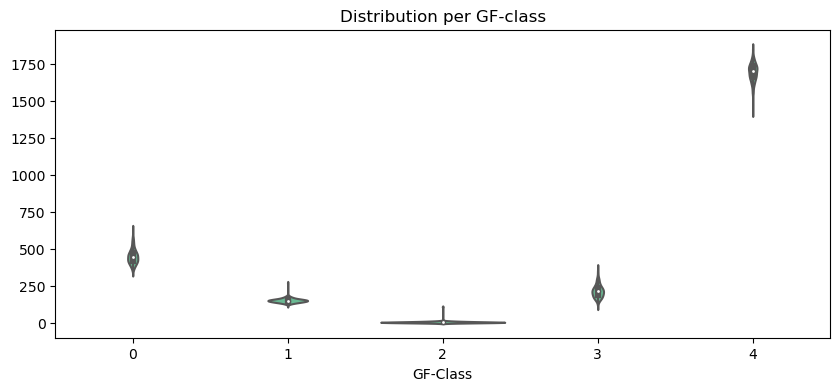

In [7]:
plt.figure(figsize=(10, 4))
sns.violinplot(data=gfs_list, color=color_scheme.primary)
plt.title("Distribution per GF-class")
plt.xlabel("GF-Class");